# Naive Bayes' Classification Algorithm #

## Generating a sample space ##

In [488]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
xvals1 = np.random.multivariate_normal([1.2,1.2],[[1,0],[0,1]], 140)
xvals0 = np.random.multivariate_normal([-1.2,-1.2],[[1,0],[0,1]], 60)

In [3]:
xvals1[:5,:]

array([[1.2568325 , 1.64814137],
       [1.83827692, 3.08107399],
       [0.3673154 , 1.41909216],
       [1.45416713, 0.17293849],
       [0.34804486, 1.62685203]])

In [4]:
xvals0[:5,:]

array([[-3.18492448, -1.31331252],
       [-0.55071702, -2.23230411],
       [-3.5665884 , -0.09799114],
       [ 0.31715628, -1.74131884],
       [-1.15899908, -2.73197249]])

In [5]:
mydata1 = np.append(xvals1,np.ones([140,1]),axis=1)
mydata0 = np.append(xvals0,np.zeros([60,1]),axis=1)
mydata = np.vstack((mydata1, mydata0))

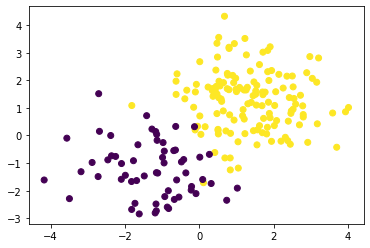

In [6]:
plt.scatter(mydata[:,0], mydata[:,1], c = mydata[:,2])
plt.show()

## Implementing Naive Bayes Line by Line ##

For an overview of the Naive Bayes algorithm, see [the Wikipedia page](https://en.wikipedia.org/wiki/Naive_Bayes_classifier).  The key is the observation $P(y_i | {\bf x}_i ) = posterior = \frac{prior \times likelihood}{evidence} = \frac{P(y_i) \cdot P({\bf x}_i | y)}{P({\bf x}_i)}$.

### Computing the "priors" for each class ###

In [7]:
class1 = mydata[mydata[:,2] == 1, :2]

In [8]:
class1[:5,:]

array([[1.2568325 , 1.64814137],
       [1.83827692, 3.08107399],
       [0.3673154 , 1.41909216],
       [1.45416713, 0.17293849],
       [0.34804486, 1.62685203]])

In [9]:
class0 = mydata[mydata[:,2] == 0, :2]

In [10]:
class0[:5,:]

array([[-3.18492448, -1.31331252],
       [-0.55071702, -2.23230411],
       [-3.5665884 , -0.09799114],
       [ 0.31715628, -1.74131884],
       [-1.15899908, -2.73197249]])

In [11]:
class0.shape[0]

60

In [12]:
class1.shape[0]

140

In [13]:
py1 = class1.shape[0]/mydata.shape[0]
py0 = class0.shape[0]/mydata.shape[0]

In [14]:
print(py1)
print(py0)

0.7
0.3


### Computing the Likelihood of x for each class (with scipy) ###

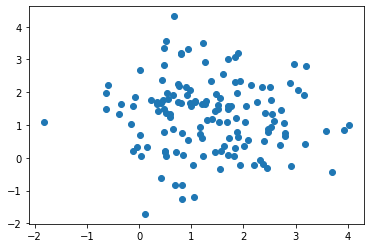

In [15]:
plt.scatter(class1[:,0], class1[:,1])

In [16]:
cov0 = np.cov(class0.T)
cov1 = np.cov(class1.T)
mean0 = np.mean(class0, axis = 0)
mean1 = np.mean(class1, axis = 0)

In [17]:
mean0

array([-1.28782194, -1.21979942])

We use scipy.stats to create an object representing each (normal) probability distribution, where the parameters are estimated from the data.

In [18]:
import scipy.stats as stats

dist0 and dist1 are the two objects.  One of their methods (.pdf) creates a probability density function, which we can then evaluate at x. 

In [65]:
dist0 = stats.multivariate_normal(mean0, cov0)
dist1 = stats.multivariate_normal(mean1, cov1)

In [20]:
dist0.pdf([-1.2,-1.2])

0.15073805632851645

In [21]:
dist1.pdf([-1.2,-1.2])

0.00032728389944592387

### Computing the conditional probability of x for each class ###

In [22]:
py1 * dist1.pdf([-1.2,-1.2])

0.0002290987296121467

In [66]:
py0 * dist0.pdf([-1.2,-1.2])

0.04522141689855493

The point $(-1.2, -1.2)$ belongs to category 0.  This confirms your visual intuition above. 

In [24]:
py1 * dist1.pdf([1.2,1.2])

0.09857646164154812

In [25]:
py0 * dist0.pdf([1.2,1.2])

4.9903787875943557e-05

The point $(1.2, 1.2)$ in category zero. Again, compare with the two-color scatter plot above.

### A function for prediction ###

The function below gives the category (0 or 1) using np.argmax.

In [107]:
def mybayes(x):
   return np.argmax([py0 * dist0.pdf(x), py1 * dist1.pdf(x)])

Checking these results and some others with the mybayes() function.

In [68]:
mybayes([-1.2,-1.2])

0

In [69]:
mybayes([1.2,1.2])

1

In [60]:
mybayes([4,4])

1

In [61]:
mybayes([-4,-4])

0

In [62]:
mybayes([0,0])

1

### An object-oriented mybayes() ###

The function doesn't really work too well.  For instance, we would like it to evaluate the category of an entire array of points, but it doesn't.  We should expect three different estimates below.

In [116]:
myX = np.array([[ -1.2,-1.2],[1.2,1.2],[4,4],[-4,-4],[0,0]])

In [117]:
myX

array([[-1.2, -1.2],
       [ 1.2,  1.2],
       [ 4. ,  4. ],
       [-4. , -4. ],
       [ 0. ,  0. ]])

In [118]:
mybayes(myX)  # I would like mybayes to give a category number (0 or 1) for each row

6

The issue is that **by default** [np.argmax](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) doesn't deal with the array correctly, and neither do the density functions.  The output below should be an array.  In the next line we force it to follow the results along 'axis 1' (i.e., each row represents a data point).

In [119]:
myval = np.array([[1,2],[2,1],[3,1],[2,3]])

In [120]:
myval

array([[1, 2],
       [2, 1],
       [3, 1],
       [2, 3]])

In [121]:
np.argmax(myval)

4

In [122]:
np.argmax(myval, axis=1)   # This gives the index (0 or 1) of the maximum value *in each row*

array([1, 0, 0, 1])

In [127]:
py1 *dist1.pdf(myX)  # This should produce an output for *each row* in myX--but it's in columns

array([2.29098730e-04, 9.85764616e-02, 9.42666263e-05, 1.56743480e-13,
       1.90289898e-02])

In [143]:
def mybayes(x):
    return np.argmax(np.array([py0 * dist0.pdf(np.array(x)), py1 * dist1.pdf(np.array(x))]).T, axis=1)

In [144]:
mybayes(myX)

array([0, 1, 1, 0, 1])

In [489]:
class myBayes():
    import scipy.stats as stats
    
    def __init__(self):
        import scipy.stats as stats
        import numpy as np

    def fit(self, X, y):
        self.classes = np.unique(np.array(y)) # list of classes
        if (self.classes.min() != 0) | (self.classes.max() != self.classes.shape[0] - 1):
            return print("Classes must be np.array[0,...n]")
        self.py = np.bincount(y.astype('int8'))/y.size  # compute the priors P(y_k) for each class
        self.dists = []
        for i in np.unique(np.array(y)):
            thisx = X[y == i]
            thismean = np.mean(thisx, axis=0)
            thiscov = np.cov(thisx.T)
            self.dists.append(stats.multivariate_normal(thismean, thiscov))
        return self

    def predict(self,X):
        myprobs = []
        for i in range(self.classes.shape[0]):
            myprobs.append(self.py[i] * np.array(self.dists[i].pdf(np.array(X))))
        return  np.argmax(np.array(myprobs).T, axis=1)
    

In [490]:
myownbayes = myBayes()

In [491]:
mydists = myownbayes.fit(myX,myy)

## Warning:  There's a slight problem with this method (see below) ##

In [492]:
mydists.predict(np.array([-1,2]))

AxisError: axis 1 is out of bounds for array of dimension 1

## But it works in general . . . ##

In [493]:
mydists.predict(myX)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0])